In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Understanding Data

In [3]:
# The shape of both datasets
print("Shape of train dataset:", df_train.shape)
print("Shape of test dataset:", df_test.shape)

Shape of train dataset: (891, 12)
Shape of test dataset: (418, 11)


In [4]:
# Preview of first 5 rows of train dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Preview of first 5 rows of test dataset
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Checking unique values in each column of train dataset
dict = {}
for i in list(df_train.columns):
    dict[i] = df_train[i].value_counts().shape[0]
pd.DataFrame(dict, index = ['Unique count']).T

,Unique count
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Cleaning

In [9]:
# Check for missing values in train dataset
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Check for missing values in test dataset
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Replace missing values in train dataset
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Cabin'] = df_train['Cabin'].fillna('unknown')
df_train = df_train.dropna()

# Replace missing values in test dataset
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Cabin'] = df_test['Cabin'].fillna('unknown')
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [12]:
# Check for duplicate values
df_train.duplicated().sum()

0

### Correlation Matrix

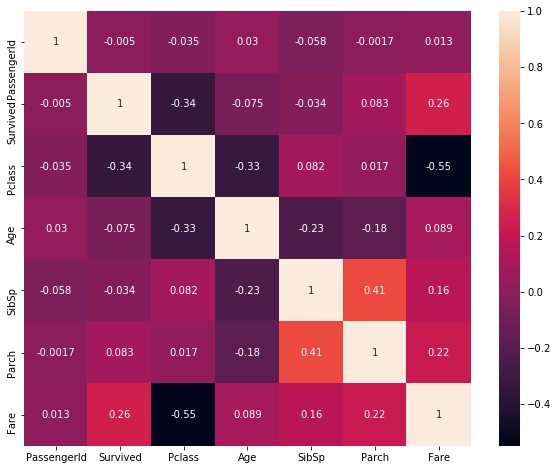

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

### Data Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
df_train[cols] = df_train[cols].apply(LabelEncoder().fit_transform)
df_test[cols] = df_test[cols].apply(LabelEncoder().fit_transform)
df_train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,unknown,2


In [15]:
x_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y_train = df_train['Survived']

In [16]:
x_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [17]:
zscore = np.abs(stats.zscore(x_train))
print(zscore)

[[0.82520863 0.73534203 0.59049493 ... 0.47432585 0.50023975 0.58683958]
 [1.57221121 1.35991138 0.64397101 ... 0.47432585 0.78894661 1.93955453]
 [0.82520863 1.35991138 0.28187844 ... 0.47432585 0.48664993 0.58683958]
 ...
 [0.82520863 1.35991138 0.00352373 ... 2.00611934 0.17408416 0.58683958]
 [1.57221121 0.73534203 0.28187844 ... 0.47432585 0.0422126  1.93955453]
 [0.82520863 0.73534203 0.18104628 ... 0.47432585 0.49017322 0.67635748]]


In [18]:
threshold = 5
print(np.where(zscore > 5))

(array([ 13,  25, 158, 179, 200, 257, 323, 609, 637, 677, 678, 736, 791,
       844, 861, 883]), array([4, 4, 3, 3, 3, 5, 3, 4, 4, 4, 5, 5, 3, 3, 3, 4]))


In [19]:
x_train1 = x_train[(zscore<5).all(axis=1)]

In [20]:
# Standardizing our training and testing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train1)
x_test = scaler.transform(x_test)

### Training the Models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

#### Logistic Regression

In [43]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

log_acc = accuracy_score(y_train, log_reg.predict(x_train))

print("Train Set Accuracy:" +str(accuracy_score(y_train, log_reg.predict(x_train))*100))

Train Set Accuracy:80.42744656917885


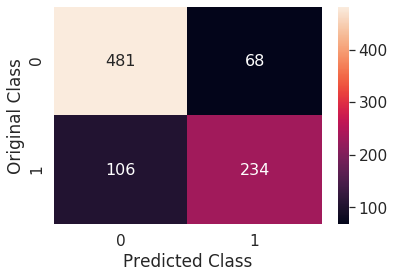

In [44]:
plt.figure(figsize=(6, 4))
df_ = pd.DataFrame(confusion_matrix(y_train, log_reg.predict(x_train)), range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_, annot=True, annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### KNeighbors

In [45]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

k_acc = accuracy_score(y_train, knn.predict(x_train))

print("Train Set Accuracy:" +str(accuracy_score(y_train, knn.predict(x_train))*100))

Train Set Accuracy:81.10236220472441


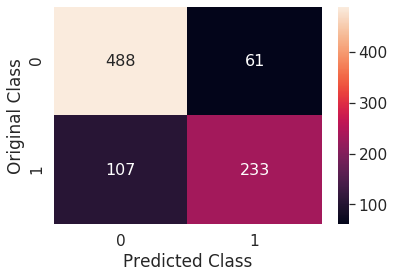

In [26]:
plt.figure(figsize=(6, 4))
df_ = pd.DataFrame(confusion_matrix(y_train, knn.predict(x_train)), range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_, annot=True, annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### Random Forest

In [46]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_acc = accuracy_score(y_train, rfc.predict(x_train))

print("Train Set Accuracy:" +str(accuracy_score(y_train, rfc.predict(x_train))*100))

Train Set Accuracy:96.62542182227222


#### Support Vector

In [29]:
svc = SVC()
svc.fit(x_train, y_train)

s_acc = accuracy_score(y_train, svc.predict(x_train))

print("Train Set Accuracy:" +str(accuracy_score(y_train, svc.predict(x_train))*100))

Train Set Accuracy:89.31383577052868


In [30]:
models = pd.DataFrame({
    'Model': ['Logistic', 'KNN', 'RandomF', 'SVC'],
    'Score': [log_acc, k_acc, rfc_acc, s_acc]
})

models.sort_values(by = 'Score', ascending=False)

,Model,Score
2,RandomF,0.964004
3,SVC,0.893138
1,KNN,0.811024
0,Logistic,0.804274


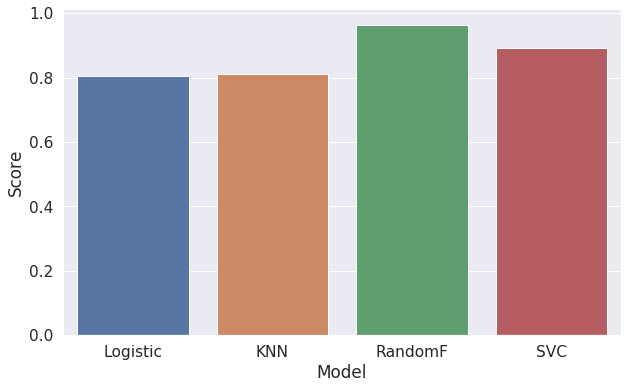

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', data=models)
plt.show()

In [52]:
prediction = rfc.predict(x_test)
prediction = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": prediction
})

prediction.to_csv('titanic_survival_prediction.csv', index=False)

In [53]:
prediction = pd.read_csv('titanic_survival_prediction.csv')
prediction.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
